In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import os
import plotly.express as px



In [11]:
df = pd.read_csv('all_data_copy.csv')

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question : Which Month had the highest sales and How much

In [13]:
#Handaling Missing values
nan_values = df[df.isna().any(axis=1)]
nan_values.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dropna(how='all',inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
df = df[df['Order Date'].str[0:1]!='O']

In [16]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

C:\Users\santj\AppData\Local\Temp\ipykernel_13608\3660826848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [18]:
#First convert the  Price into Float and Quantity into int
df['Price Each']=df['Price Each'].astype(float)
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [19]:
# First calculate total amount
df['Total'] = df['Price Each']*df['Quantity Ordered']

In [20]:
df_max = df.groupby(['Month'])['Total'].sum()
df_max

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64

In [21]:
# Lets check the result through Graphs

In [22]:
fig = px.bar(df, x=df_max.index, y= df_max, title='Monthly Sales in USD' )
fig.update_xaxes(tickmode='array', tickvals=df_max.index)
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales in USD ($)',)
fig.show()

### Question : Which City sold the most products

In [23]:
# First a column of cities names
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} {x.split(',')[2].split()[0]}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [24]:
df.groupby('City')['Total'].sum()

City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Total, dtype: float64

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

C:\Users\santj\AppData\Local\Temp\ipykernel_13608\344284829.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [26]:
df_time = df.groupby('Hour')
df_time

<Axes: xlabel='Hour', ylabel='Total'>

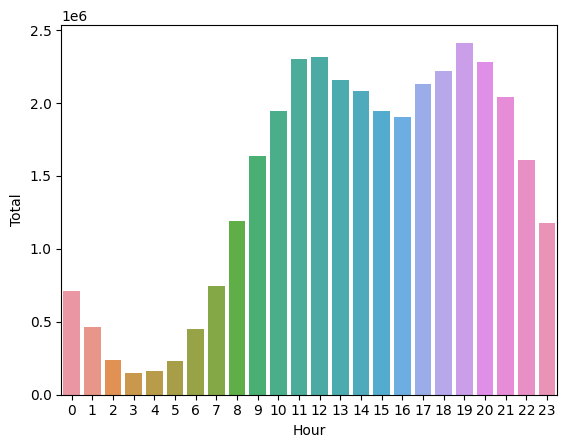

In [27]:
sn.barplot(x=df.groupby('Hour')['Total'].sum().index , y=df.groupby('Hour')['Total'].sum())

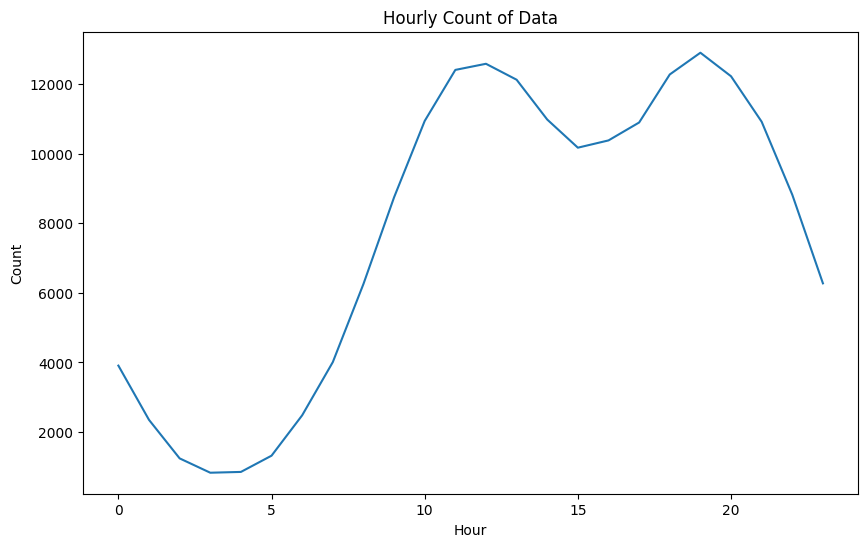

In [35]:
hourly_counts = df.groupby('Hour').count()['Quantity Ordered']

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sn.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Count of Data')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [29]:
df.groupby('Product').count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
Product,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800


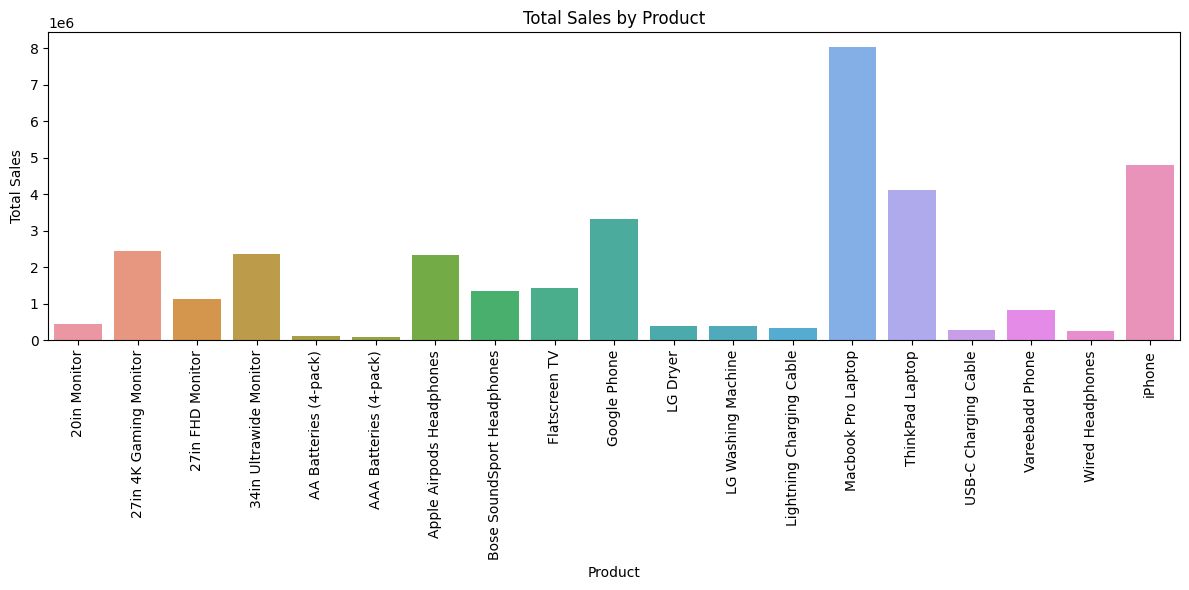

In [36]:
group = df.groupby('Product')['Total'].sum()


plt.figure(figsize=(12, 6))  
sn.barplot(x=group.index, y=group.values)
plt.xticks(rotation=90)  
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()